In [49]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [50]:
df = pd.read_excel('2010-2020 train.xlsx')
df

,행정구역(시도),행정구역(시군구),연도,총인구수(명),유치원 수,초등학교 수,출생건수,사망건수,혼인건수,이혼건수,학령인구(명),총인구수-학령인구(명),행정구역
0,강원특별자치도,횡성군,2010,44254,15,16,280,410,201,94,7229,37025,강원특별자치도 횡성군
1,강원특별자치도,횡성군,2011,44360,14,16,247,439,179,117,7154,37206,강원특별자치도 횡성군
2,강원특별자치도,횡성군,2012,44615,14,16,261,431,194,87,6942,37673,강원특별자치도 횡성군
3,강원특별자치도,횡성군,2013,44937,14,16,204,450,194,90,6765,38172,강원특별자치도 횡성군
4,강원특별자치도,횡성군,2014,45373,13,16,207,480,211,107,6648,38725,강원특별자치도 횡성군
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,경기도,가평군,2016,62448,16,13,363,608,269,143,8599,53849,경기도 가평군
2449,경기도,가평군,2017,62973,16,13,362,605,269,147,8367,54606,경기도 가평군
2450,경기도,가평군,2018,62918,15,13,301,662,244,177,8094,54824,경기도 가평군
2451,경기도,가평군,2019,62415,14,13,261,642,272,139,7755,54660,경기도 가평군


In [51]:
df = df.drop((["행정구역(시도)","총인구수-학령인구(명)","행정구역","행정구역(시군구)","유치원 수","출생건수","혼인건수","연도","초등학교 수","사망건수","이혼건수"]), axis=1)
df

,총인구수(명),학령인구(명)
0,44254,7229
1,44360,7154
2,44615,6942
3,44937,6765
4,45373,6648
...,...,...
2448,62448,8599
2449,62973,8367
2450,62918,8094
2451,62415,7755


In [52]:
chunk_size = 11
chunks = [df.iloc[i:i+chunk_size] for i in range(0, len(df), chunk_size)]

# 결과 확인
for chunk in chunks:
    print(chunk)
    print("\n" + "="*40 + "\n")

    총인구수(명)  학령인구(명)
0     44254     7229
1     44360     7154
2     44615     6942
3     44937     6765
4     45373     6648
5     45777     6588
6     45991     6353
7     46281     6188
8     46726     5941
9     46575     5679
10    46472     5394


    총인구수(명)  학령인구(명)
11    24364     3981
12    24945     3986
13    25020     3953
14    25079     3936
15    27143     4205
16    27020     3906
17    26264     3569
18    26022     3493
19    25084     3266
20    24917     3195
21    24857     3077


    총인구수(명)  학령인구(명)
22    69368    13064
23    68985    12923
24    68378    12621
25    67829    12387
26    66772    11834
27    65848    11359
28    65303    10920
29    64680    10502
30    63933     9989
31    62737     9401
32    62522     8984


    총인구수(명)  학령인구(명)
33   505838   102533
34   516765   104856
35   525490   107298
36   530251   109618
37   540862   112051
38   596525   121415
39   640890   128503
40   691086   136096
41   758722   147357
42   815396   156241
43   85

In [53]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler




target_column = '총인구수(명)'

# Split the data into chunks
chunk_size = 11
chunks = [df[i:i+chunk_size] for i in range(0, len(df), chunk_size)]

# 기존 값들을 저장할 딕셔너리
original_values = {}

# 예측 결과를 저장할 딕셔너리
predicted_values = {}

# 새로운 열을 추가할 딕셔너리
new_column_values = {}

for i, chunk in enumerate(chunks):
    print(f"Processing Chunk {i + 1}")

    # 각 chunk에서 선택한 열의 데이터 가져오기 (마지막 행 제외)
    column_data = chunk[target_column].tolist()[:-1]

    # 기존 값들을 저장
    key = f"{target_column}_Chunk{i + 1}_Original"
    original_values[key] = column_data

    # 학습 데이터
    train_data = np.array(column_data)
    train_data_scaled = StandardScaler().fit_transform(train_data.reshape(-1, 1))

    # 모델 생성 (Linear Regression)
    model = LinearRegression()

    # 모델 학습
    model.fit(train_data_scaled[:-1], train_data_scaled[1:])

    # 다음 값을 예측
    next_value_scaled = model.predict(train_data_scaled[-1].reshape(1, -1))
    next_value = StandardScaler().fit(train_data.reshape(-1, 1)).inverse_transform(next_value_scaled.reshape(1, -1))

    # 예측값을 기존 데이터에 추가
    column_data += [next_value[0, 0]]
    predicted_values[key] = column_data

    # 새로운 열을 추가할 딕셔너리에 저장
    new_column_values[key] = predicted_values[key]

# 예측 결과 및 기존 값 출력
for key, values in predicted_values.items():
    print(f"{key} Values with Prediction:")
    print(values)
    print("=" * 40)

# 새로운 열을 추가한 값 출력
for key, value in new_column_values.items():
    print(f"{key} New Column Value:")
    print(value)
    print("=" * 40)

Processing Chunk 1
Processing Chunk 2
Processing Chunk 3
Processing Chunk 4
Processing Chunk 5
Processing Chunk 6
Processing Chunk 7
Processing Chunk 8
Processing Chunk 9
Processing Chunk 10
Processing Chunk 11
Processing Chunk 12
Processing Chunk 13
Processing Chunk 14
Processing Chunk 15
Processing Chunk 16
Processing Chunk 17
Processing Chunk 18
Processing Chunk 19
Processing Chunk 20
Processing Chunk 21
Processing Chunk 22
Processing Chunk 23
Processing Chunk 24
Processing Chunk 25
Processing Chunk 26
Processing Chunk 27
Processing Chunk 28
Processing Chunk 29
Processing Chunk 30
Processing Chunk 31
Processing Chunk 32
Processing Chunk 33
Processing Chunk 34
Processing Chunk 35
Processing Chunk 36
Processing Chunk 37
Processing Chunk 38
Processing Chunk 39
Processing Chunk 40
Processing Chunk 41
Processing Chunk 42
Processing Chunk 43
Processing Chunk 44
Processing Chunk 45
Processing Chunk 46
Processing Chunk 47
Processing Chunk 48
Processing Chunk 49
Processing Chunk 50
Processin

In [54]:
df2 = pd.read_excel('2021 test.xlsx')
df2 = df2.drop((["행정구역(시도)","총인구수-학령인구(명)","행정구역","행정구역(시군구)","유치원 수","출생건수","혼인건수","연도","초등학교 수","사망건수","이혼건수"]), axis=1)
df2

,총인구수(명),학령인구(명)
0,46481,5172
1,24195,2976
2,62624,8715
3,887015,168011
4,68365,7881
...,...,...
218,299182,34250
219,212965,29754
220,462664,64482
221,533042,90527


총인구수(명)_Chunk1_Original Last Value with Prediction:
46768.21447081564
총인구수(명)_Chunk2_Original Last Value with Prediction:
25324.937524077308
총인구수(명)_Chunk3_Original Last Value with Prediction:
61717.28413271413
총인구수(명)_Chunk4_Original Last Value with Prediction:
899716.8630075199
총인구수(명)_Chunk5_Original Last Value with Prediction:
69668.2794414629
총인구수(명)_Chunk6_Original Last Value with Prediction:
101381.81055799175
총인구수(명)_Chunk7_Original Last Value with Prediction:
401538.8514429711
총인구수(명)_Chunk8_Original Last Value with Prediction:
68414.88043010059
총인구수(명)_Chunk9_Original Last Value with Prediction:
44072.60623905569
총인구수(명)_Chunk10_Original Last Value with Prediction:
32343.882978725684
총인구수(명)_Chunk11_Original Last Value with Prediction:
39449.80762161118
총인구수(명)_Chunk12_Original Last Value with Prediction:
65711.9825148362
총인구수(명)_Chunk13_Original Last Value with Prediction:
46747.89142341242
총인구수(명)_Chunk14_Original Last Value with Prediction:
300654.318128385
총인구수(명)_Chunk15

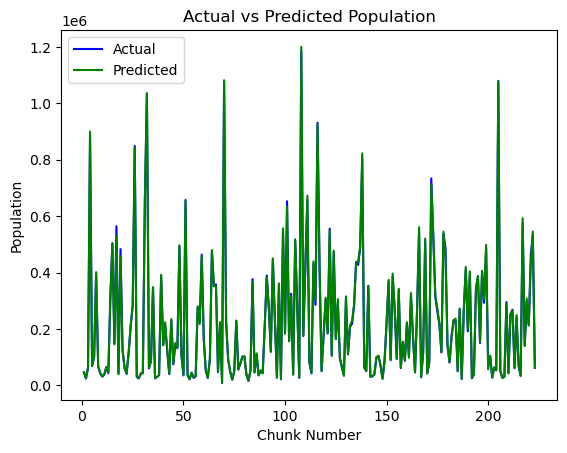

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Lists to store the chunk numbers and corresponding last values with predictions
chunk_numbers_last_value = []
last_values_with_predictions = []

# 새로운 열을 추가한 값 출력
for i, (key, values) in enumerate(predicted_values.items()):
    print(f"{key} Last Value with Prediction:")
    print(values[-1])
    print("=" * 40)

    # Append the chunk number to the list
    chunk_numbers_last_value.append(i + 1)

    # Append the last value with prediction to the list
    last_values_with_predictions.append(values[-1])

# '총인구수(명)' 열이 df2에 있는지 확인
if '총인구수(명)' in df2.columns:
    # '총인구수(명)' 열의 데이터 가져오기
    actual_values_df2 = df2['총인구수(명)']

    # Check for missing values
    if actual_values_df2.isnull().sum() > 0:
        print("Warning: '총인구수(명)' column in df2 contains missing values.")

    # Check data types
    if actual_values_df2.dtype != np.number:
        print("Warning: '총인구수(명)' column in df2 is not of numeric data type.")

    # Convert to NumPy array
    actual_values_array_df2 = actual_values_df2.to_numpy()

    # Ensure that the lengths match
    min_length = min(len(actual_values_array_df2), len(last_values_with_predictions))

    # Plot the values
    plt.plot(chunk_numbers_last_value[:min_length], actual_values_array_df2[:min_length], linestyle='-', color='b', label='Actual')
    plt.plot(chunk_numbers_last_value[:min_length], last_values_with_predictions[:min_length],  linestyle='-', color='g', label='Predicted')

    # Calculate MAPE
    mape_score_df2 = np.mean(np.abs((actual_values_array_df2[:min_length] - np.array(last_values_with_predictions[:min_length])) / actual_values_array_df2[:min_length])) * 100

    # Print the MAPE Score
    print("=" * 40)
    print(f"MAPE Score for '총인구수(명)' in df2: {mape_score_df2:.2f}%")

    # Add labels and legend
    plt.xlabel('Chunk Number')
    plt.ylabel('Population')
    plt.title('Actual vs Predicted Population')
    plt.legend()

    # Show the plot
    plt.show()
else:
    print("'총인구수(명)' column not found in df2.")